# Arsenal Social Sentiment Analysis
## Forecasting User Sentiment between games. 
by *Ben N. Bellman* 
<br> Prepared as Springboard Capstone Project
<br> *4/13/2022*

<img src="../images/who-s-denilo-SuBb_SiEEM8-unsplash.jpg" style="width:800px;height:400px"/>

### WARNING: 
*Although the usernames have been anonymized as to protect the privacy of the users in this analysis, the tweets are still in raw format and may contain inappropriate / sensitive content. Viewer discretion is advised*

## Outline

## Data Mapping: 

One of the important things to know for the analysis is the schedule of the games.
The objective in the social sentiment analysis is to predict whether or not a specific tweet is likely to come  

In [1]:
%load_ext watermark
%watermark 

Last updated: 2022-05-02T17:03:34.002506-07:00

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.0.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [2]:
## We start by importing the packages we will use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb 

from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, f1_score, fbeta_score 
from sklearn.metrics import plot_confusion_matrix,classification_report, balanced_accuracy_score, recall_score
from sklearn.metrics import roc_auc_score, log_loss,matthews_corrcoef, ConfusionMatrixDisplay

from io import StringIO 
from IPython.display import Image,HTML 
import pydotplus
import graphviz
import shap

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',-1)
%matplotlib inline

In [3]:
pwd

'C:\\Users\\benja\\1.SpringBoard\\Github_Repos\\Arsenal_Sentiment_Analysis\\Notebooks'

In [4]:
## Import Functions from pandas module.
import sys
sys.path.insert(1, './../../Analysis_Functions_For_Pandas')
from functions import (preview_data,
                       get_missing_counts,
                       get_value_counts,
                       get_unique_column_count,
                       get_datetimes)   

In [5]:
## Load the Data
df = pd.read_csv('.\..\Data\Finalized_DataFrame_All_Data.csv')

## I. Data Exploration and Data Wrangling

In [6]:
## Start by previewing the data:
preview_data(df)

First Five Rows of Data: 



,Unnamed: 0,Query,Date,User,Tweet,TweetLikes,TweetReplies,RetweetCount,Result,Team
0,0,Arsenal until:2022-04-23,2022-04-22 23:59:56+00:00,RoweThings,"Can’t seem to find any serious buyers tonight for the game, so going to give one away (well not exactly) Xbox one new edition players get the chance to play me Arsenal Vs United on fifa and if you win the ticket is yours. No money. No scam involved #ARSMUN @arsenaltickets9 #scam",0,3,0,1,Arsenal
1,1,Arsenal until:2022-04-23,2022-04-22 23:59:54+00:00,Ancurancuran01,Gabsus solusi masalah striker Arsenal kah?? https://t.co/x7KYqk0pYJ,0,0,0,1,Arsenal
2,2,Arsenal until:2022-04-23,2022-04-22 23:59:54+00:00,celsky07,"@el3estuvodemas @m_delprado_7 @agus____1974 @jachaci3 @DiarioOle Agregar que Arsenal venía fuerte con el Papu Gómez...se habían chingado en semifinales a River Plate. De cualquier forma, vencer a Grondona estaba difícil.",1,1,0,1,Arsenal
3,3,Arsenal until:2022-04-23,2022-04-22 23:59:53+00:00,fachry4,Payah nih yang ngancem bom. Jadi ga maen dah dia pas lawan Arsenal https://t.co/gxvokwP5ye,0,0,0,1,Arsenal
4,4,Arsenal until:2022-04-23,2022-04-22 23:59:51+00:00,GunnersDXB,If this happens the arsenal are acc back. https://t.co/SLMr1EZtnb,1,0,0,1,Arsenal



 Shape: 

(370000, 10)

 Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370000 entries, 0 to 369999
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    370000 non-null  int64 
 1   Query         370000 non-null  object
 2   Date          370000 non-null  object
 3   User          370000 non-null  object
 4   Tweet         370000 non-null  object
 5   TweetLikes    370000 non-null  int64 
 6   TweetReplies  370000 non-null  int64 
 7   RetweetCount  370000 non-null  int64 
 8   Result        370000 non-null  int64 
 9   Team          370000 non-null  object
dtypes: int64(5), object(5)
memory usage: 28.2+ MB
None


In [7]:
## Get the missing values
get_missing_counts(df)

Missing Value Percentages by Column: 

Unnamed: 0 -----> 0 -----> 0.0%
Query -----> 0 -----> 0.0%
Date -----> 0 -----> 0.0%
User -----> 0 -----> 0.0%
Tweet -----> 0 -----> 0.0%
TweetLikes -----> 0 -----> 0.0%
TweetReplies -----> 0 -----> 0.0%
RetweetCount -----> 0 -----> 0.0%
Result -----> 0 -----> 0.0%
Team -----> 0 -----> 0.0%


In [8]:
## Converts date to datetime. 

# Fix this --> get_datetimes(df,'Date',['Date'])
df['Date'] = df['Date'].apply(pd.to_datetime)
print('Date Ranges: {} -- {}'.format(df['Date'].min(), df['Date'].max()))

Date Ranges: 2017-08-10 22:45:01+00:00 -- 2022-04-22 23:59:56+00:00


Ok, so the date ranges are between 03-29-22 and 4-13-22, so the 500,000 tweets about Arsenal are all in a two week period. 
<br> In that two week period, Arsenal were coming out of the international break and played two games which they both lost: 
- **Crystal Palace** -- *04-04-22*  
- **Brighton & Holvion** -- *04-09-22* 

In [9]:
## Get unique values in each column: 
get_unique_column_count(df)

Unique values in each object column: 

Query: 370
User: 200703
Tweet: 363860
Team: 2


Looking at this, we have a little more than twice as many tweets as users. 

In [10]:
## Get Values
get_value_counts(df)

Unique values in each object column: 

Query
Arsenal until:2022-04-23      1000
Arsenal until:2019-02-09      1000
Arsenal until:2019-01-01      1000
Arsenal until:2019-01-12      1000
Tottenham until:2019-01-13    1000
                              ... 
Tottenham until:2020-12-06    1000
Arsenal until:2020-12-06      1000
Tottenham until:2020-12-13    1000
Arsenal until:2020-12-13      1000
Arsenal until:2017-08-11      1000
Name: Query, Length: 370, dtype: int64{}


User
SpursNewsApp       1010
TottenhamNews      992 
weatherN15         940 
AlertsHotspur      842 
spursnewsonly      653 
                  ...  
Ali66289721        1   
Melfranck5         1   
lucio_mendoza18    1   
josemarm_          1   
Chiedozielam       1   
Name: User, Length: 200703, dtype: int64{}


Tweet
Klub Lokal Indonesia, Niac Mitra Mengalahkan   Arsenal 2-0 pada 16 Juni 1983 di Surabaya.                                                                                                                      

In [11]:
## We can look at the distribution of our tweets.
df.describe()

,Unnamed: 0,TweetLikes,TweetReplies,RetweetCount,Result
count,370000.000000,370000.000000,370000.000000,370000.000000,370000.000000
mean,184999.500000,11.767422,0.707508,1.327559,0.510811
std,106809.944138,207.662080,7.013142,26.875180,0.499884
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92499.750000,0.000000,0.000000,0.000000,0.000000
50%,184999.500000,0.000000,0.000000,0.000000,1.000000
75%,277499.250000,1.000000,1.000000,0.000000,1.000000
max,369999.000000,24743.000000,1318.000000,4633.000000,1.000000


## II. Exploratory Data Analysis

We can look at the distribution of tweets.

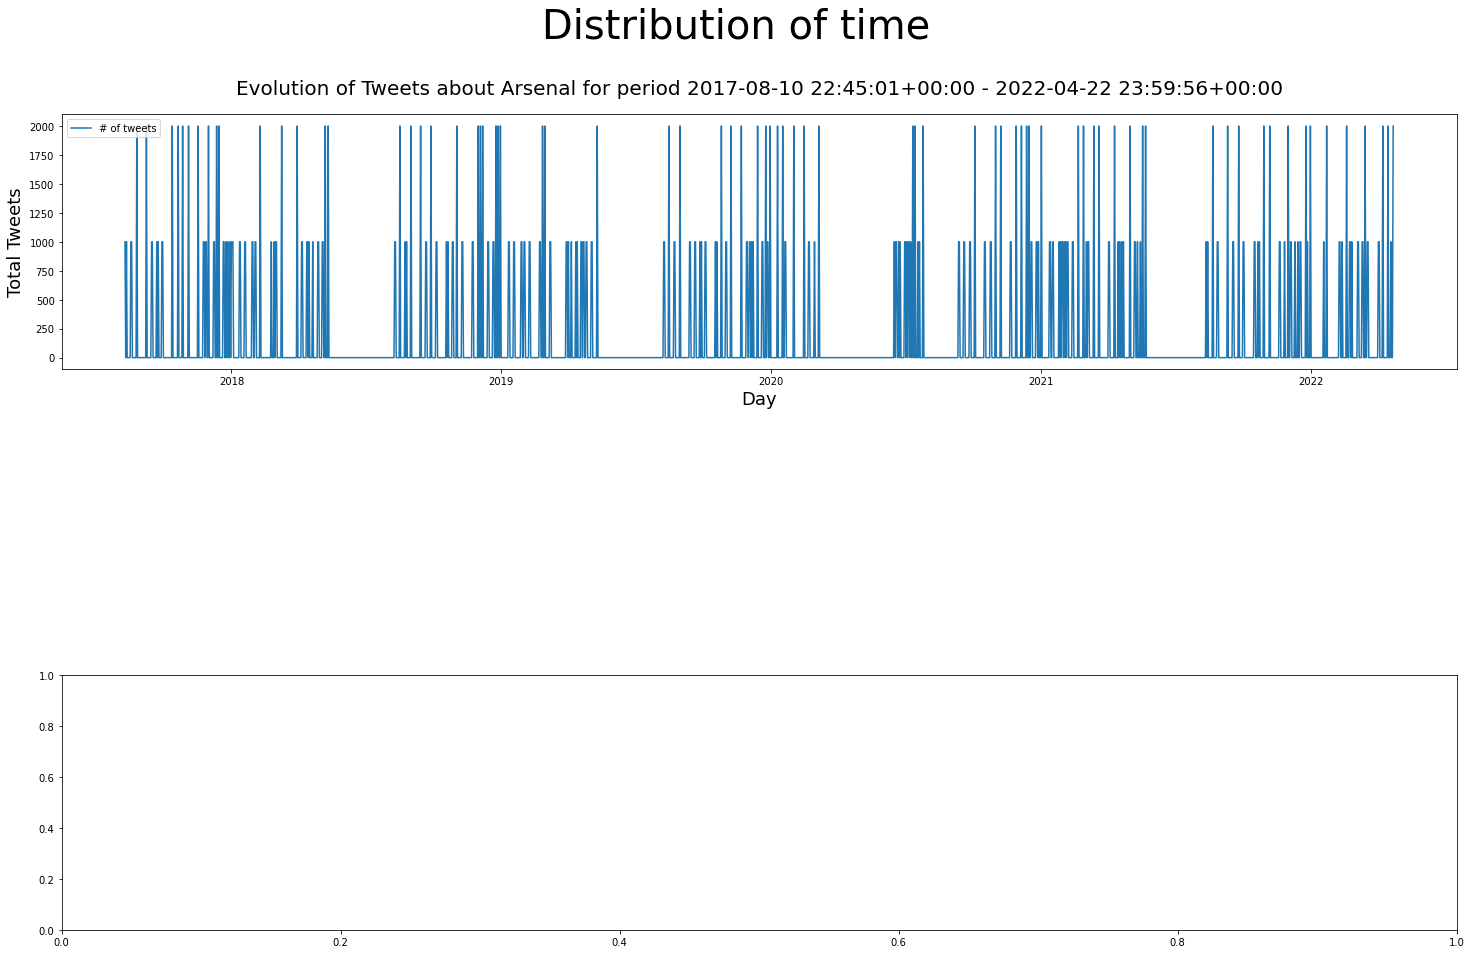

<Figure size 1440x576 with 0 Axes>

In [12]:
## We create a time-series Dataframe and resample by day.
time_df = df[['Date','User']]
time_df['Date'] = pd.to_datetime(time_df['Date'])
time_df['Tweet'] = 1
time_df.drop(columns='User', inplace=True)
time_df.set_index('Date', inplace = True)
time_df = time_df.resample('d').sum()
time_df

## We plot the number of tweets during the time period.
fig, axes = plt.subplots(2, figsize=(25,15))
fig.suptitle('Distribution of time', fontsize =40)
fig.subplots_adjust(hspace=1.2)
plt.figure(figsize=(20,8))

axes[0].plot(time_df, label = '# of tweets')
axes[0].set_title('Evolution of Tweets about Arsenal for period {} - {}'.format(df['Date'].min(), df['Date'].max()), fontsize = 20, pad =20)
axes[0].set_xlabel('Day', fontsize = 18)
axes[0].set_ylabel('Total Tweets', fontsize = 18)
axes[0].legend(loc='best')
plt.show()

Let's look at a preview of the 10 most liked tweets. 

In [13]:
## Let's look at the 10 most popular tweets in the dataset.
df[['Tweet','Date','TweetLikes','User']].sort_values('TweetLikes', ascending =False).head(10)

,Tweet,Date,TweetLikes,User
126448,"🇪🇸 Back in the @SeFutbol squad\n\nProud of you, @HectorBellerin 🔴 https://t.co/vANXWxnO87",2020-11-07 23:06:00+00:00,24743,Arsenal
33747,Breaking the i̶n̶t̶e̶r̶n̶e̶t̶ web 🕸\n\n🕷 @SpiderManMovie https://t.co/0CTs0XQqEi,2021-12-18 21:00:07+00:00,24505,SpursOfficial
123184,"Lampard's Chelsea haven't lost in 10 games.\n\nMourinho's Tottenham haven't lost in 8.\n\nTomorrow, they meet at Stamford Bridge ⚔️ https://t.co/vRm8X6F3IM",2020-11-28 23:05:24+00:00,21680,brfootball
292857,"Looking forward to meeting you and, above all, showing on the pitch we are @Arsenal COYG! https://t.co/pq4wxpYGQ6",2018-08-11 22:42:36+00:00,21555,UnaiEmery_
235513,O novo estádio do Tottenham é lindo! https://t.co/iymn4f1tmo,2019-03-08 21:36:20+00:00,21328,mundodabola
83879,"Arteta: “I speak with Ødegaard every day. I see his face, his body language: he seems really happy here at Arsenal. His contract here is until the end of the season. What we have to do is try to make him perform, develop and be as happy as he can be”. @ChrisWheatley_ ⚪️🔴 #AFC",2021-04-02 22:11:00+00:00,20329,FabrizioRomano
127469,💙 @alexmorgan13 💙 \n\n#THFC ⚪️ #COYS https://t.co/UUR1HEAeGJ,2020-11-07 21:34:25+00:00,18702,SpursOfficial
108987,🇰🇷 📸 Sonny's been a 𝙗𝙖𝙡𝙡𝙚𝙧 since day one!\n\n#THFC ⚪️ #COYS https://t.co/68fzXL60CL,2021-01-12 21:41:00+00:00,18611,SpursOfficial
31570,"Mikel Arteta on Arsenal signings for January: “If you can tweak what you need to in that period, which is not easy, it would be really helpful”. 🔴 #AFC @NickAmes82 \n\n“We are working on that to see the necessities we can have, and whether we can find the right solutions to that”.",2021-12-25 22:45:35+00:00,16963,FabrizioRomano
202369,"Keep grinding, @LacazetteAlex 👊\n\nWe can't wait to have you back in contention ❤️ https://t.co/XbRUbD4NMk",2019-10-05 23:04:01+00:00,15984,Arsenal


## III. Preprocessing and Modeling

## IV. Conclusions